In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Feb  9 01:47:27 2019

@author: avaca
"""

from sklearn.mixture import GaussianMixture

import pandas as pd

import numpy as np

data = pd.read_csv('transformados03.csv')

target = data['TARGET']

data.drop('TARGET', axis = 1, inplace = True)

In [266]:
def get_clusters(X, components):
        
    bic = 1000000
    
    comp = 0
    
    models = {}
    
    for i in range(1, components):
        
        model = GaussianMixture(i, covariance_type = 'full', random_state = 7).fit(X)
        
        bic_model = model.bic(X)
        
        models[str(i)+'_model'] = bic_model
        
        if bic_model < bic:
            
            comp = components
            
            bic = bic_model
        
        else:
            
            next
    
    best_model = {str(comp) + 'components_bic': bic}
    
    return best_model, models

In [17]:
best, models = get_clusters(data, 10)

In [18]:
best

{'10components_bic': [-4720665.783037449]}

In [19]:
models

{'1_model': -2479279.4152834993,
 '2_model': -2850785.5716720223,
 '3_model': -3619559.279959215,
 '4_model': -4105782.605304913,
 '5_model': -4249157.631881179,
 '6_model': -4552735.067490527,
 '7_model': -4596495.851544435,
 '8_model': -4454064.95150842,
 '9_model': -4720665.783037449}

In [20]:
import matplotlib.pyplot as plt

%matplotlib notebook

In [49]:
models[str(10)+'_model'] = best['10components_bic'][0]



In [50]:
bics = list(models.values())

In [ ]:
len(bics)

In [42]:
num = range(1, len(bics) + 1)

In [51]:
bics[9]

-4720665.783037449

In [43]:
len(num)

10

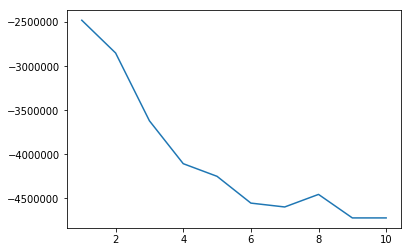

In [52]:
plt.plot(num, bics, label = 'BIC')

In [60]:
GaussianMixture(15, covariance_type = 'full', random_state = 7).fit(data).bic(data)

-4802689.000158407

In [63]:
clusters = GaussianMixture(20, covariance_type = 'full', random_state = 7).fit(data).predict(data)

In [66]:
data['cluster'] = clusters

In [92]:
#data['TARGET'] = np.exp(target) + 1


In [93]:
a = data[['cluster', 'TARGET']]

grouped = a.groupby('cluster').mean()

In [94]:
grouped.dtypes

TARGET    float64
dtype: object

In [100]:
plt.rcParams['figure.figsize'] = (12, 12)

In [105]:
#plt.rcParams.keys()

pd.set_option('display.max_columns', 200)

In [106]:
data.groupby('cluster').describe()

HY_antiguedad                                               \
                count      mean       std  min  25%  50%  75%  max   
cluster                                                              
0               461.0  0.206074  0.404923  0.0  0.0  0.0  0.0  1.0   
1               539.0  0.230056  0.421259  0.0  0.0  0.0  0.0  1.0   
2               115.0  0.895652  0.307049  0.0  1.0  1.0  1.0  1.0   
3               327.0  0.706422  0.456099  0.0  0.0  1.0  1.0  1.0   
4               543.0  0.530387  0.499536  0.0  0.0  1.0  1.0  1.0   
5                80.0  0.475000  0.502525  0.0  0.0  0.0  1.0  1.0   
6               667.0  0.773613  0.418806  0.0  1.0  1.0  1.0  1.0   
7               307.0  0.534202  0.499643  0.0  0.0  1.0  1.0  1.0   
8               324.0  0.509259  0.500688  0.0  0.0  1.0  1.0  1.0   
9               453.0  0.856512  0.350957  0.0  1.0  1.0  1.0  1.0   
10              209.0  0.392344  0.489445  0.0  0.0  0.0  1.0  1.0   
11              454.0  0.350220  0.477565  0.0  0.0  0.0  1.0  1.0   
12              146.0  0.452055  0.499409  0.0  0.0  0.0  1.0  1.0   
13              191.0  0.146597  0.354633  0.0  0.0  0.0  0.0  1.0   
14              103.0  0.048544  0.215963  0.0  0.0  0.0  0.0  1.0   
15              669.0  0.657698  0.474835  0.0  0.0  1.0  1.0  1.0   
16              152.0  0.059211  0.236799  0.0  0.0  0.0  0.0  1.0   
17              171.0  0.017544  0.131672  0.0  0.0  0.0  0.0  1.0   
18              477.0  0.551363  0.497877  0.0  0.0  1.0  1.0  1.0   
19              409.0  0.562347  0.496705  0.0  0.0  1.0  1.0  1.0   

        HY_metros_totales                                              \
                    count      mean       std           min       25%   
cluster                                                                 
0                   461.0  0.000066  0.000090  2.087912e-05  0.000041   
1                   539.0  0.000067  0.000086  1.912088e-05  0.000042   
2                   115.0  0.000065  0.000065  2.126374e-05  0.000038   
3                   327.0  0.000025  0.000109  1.291209e-06  0.000012   
4                   543.0  0.000021  0.000022  2.582418e-06  0.000012   
5                    80.0  0.000013  0.000004  7.417582e-07  0.000013   
6                   667.0  0.000069  0.000218  2.123626e-05  0.000041   
7                   307.0  0.000095  0.000090  1.043956e-05  0.000051   
8                   324.0  0.000034  0.000306  1.098901e-06  0.000012   
9                   453.0  0.000054  0.000034  1.945055e-05  0.000040   
10                  209.0  0.000090  0.000110  1.648352e-06  0.000024   
11                  454.0  0.000094  0.000368  1.538462e-05  0.000044   
12                  146.0  0.001449  0.009439  2.747253e-06  0.000016   
13                  191.0  0.000177  0.000631  3.791209e-06  0.000046   
14                  103.0  0.002203  0.010383  1.153846e-05  0.000061   
15                  669.0  0.000033  0.000300  1.538462e-06  0.000010   
16                  152.0  0.001488  0.007489  2.881868e-05  0.000137   
17                  171.0  0.001967  0.016463  2.994505e-06  0.000054   
18                  477.0  0.000115  0.000130  8.186813e-06  0.000051   
19                  409.0  0.000074  0.000278  2.084066e-05  0.000041   

                                      HY_num_banos                           \
              50%       75%       max        count      mean       std  min   
cluster                                                                       
0        0.000049  0.000058  0.000549        461.0  0.222614  0.118945  0.0   
1        0.000052  0.000061  0.000549        539.0  0.245638  0.112004  0.0   
2        0.000047  0.000060  0.000549        115.0  0.273136  0.079275  0.0   
3        0.000014  0.000015  0.001786        327.0  0.003311  0.034457  0.0   
4        0.000014  0.000018  0.000219        543.0  0.000000  0.000000  0.0   
5        0.000013  0.000015  0.000024         80.0  0.000000  0.000000  0.0   
6     

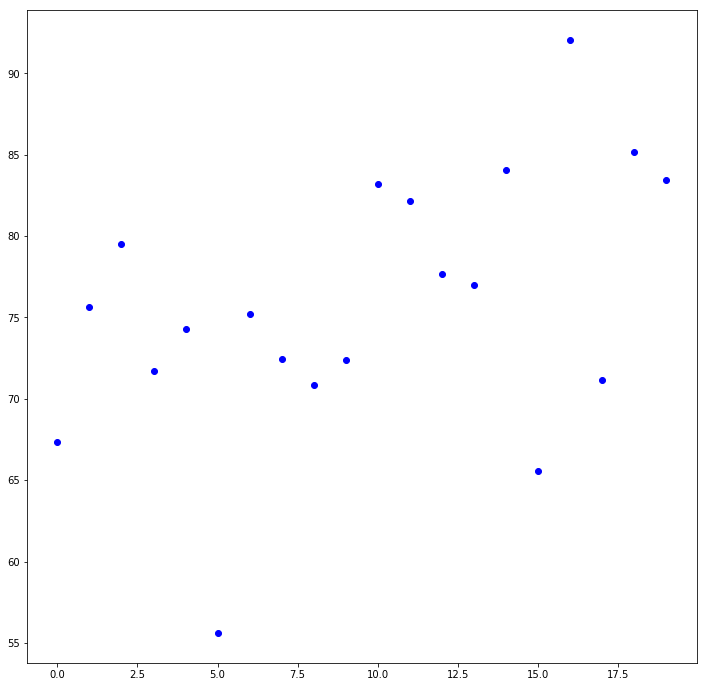

In [102]:
plt.plot(grouped.index, grouped['TARGET'], 'bo')

In [267]:
from sklearn.decomposition import PCA

In [268]:
pca = PCA(0.99, whiten = True)

In [269]:
data1 = pca.fit_transform(data)

In [270]:
data1.shape

(6797, 45)

In [58]:
data.shape

(6797, 100)

Almost 50% reduction of dimensions with almost no information lost.  

In [110]:
pd.DataFrame(data1).to_csv('pcadf.csv', sep = ',', encoding = 'utf-8')

In [111]:
#pd.to_csv('pcadf.csv', sep = ',', encoding = 'utf-8')

In [ ]:
from sklearn.cluster import FeatureAgglomeration

In [115]:
from sklearn.cluster import AgglomerativeClustering

In [113]:
from sklearn.metrics import silhouette_score

In [273]:
def hierarchical(X, cluster_n):
    
    silhouette = 0
    
    best_cluster = {}
    
    best = 0
    
    clusters = {}
    
    for i in range(2, cluster_n):
        
        model_labels = AgglomerativeClustering(n_clusters = i).fit_predict(X)
        
        silhouette_avg = silhouette_score(X, model_labels)
        
        clusters[str(i)+'_hier_clust'] = silhouette_avg
        
        if silhouette_avg > silhouette:
            
            silhouette = silhouette_avg
            
            best = i
            
    best_cluster[str(best)+'hier_clust'] = silhouette
    
    return best_cluster, clusters

In [274]:
best_hier, clusters_hier = hierarchical(data, 20)

In [275]:
best_hier

{'2hier_clust': 0.4501790157102184}

In [276]:
clusters_hier

{'2_hier_clust': 0.4501790157102184,
 '3_hier_clust': 0.2309870290145135,
 '4_hier_clust': 0.19827211889602275,
 '5_hier_clust': 0.20027465201741126,
 '6_hier_clust': 0.21220692447381037,
 '7_hier_clust': 0.13094881893754623,
 '8_hier_clust': 0.1332949471378504,
 '9_hier_clust': 0.1369402428769732,
 '10_hier_clust': 0.11531267670947744,
 '11_hier_clust': 0.09187532879556483,
 '12_hier_clust': 0.09677845587126023,
 '13_hier_clust': 0.09761683863130839,
 '14_hier_clust': 0.10148418062267162,
 '15_hier_clust': 0.10610901429761525,
 '16_hier_clust': 0.1058370197056242,
 '17_hier_clust': 0.10884608186918782,
 '18_hier_clust': 0.11233187036404213,
 '19_hier_clust': 0.11653085562718282}

In [277]:
from sklearn.ensemble import RandomForestRegressor

In [278]:
rf = RandomForestRegressor(n_estimators = 600, criterion = 'mse')

In [279]:
data['cluster'] = AgglomerativeClustering(n_clusters = 2).fit_predict(data)

In [280]:
data2 = data

data2['TARGET'] = target

In [281]:
Xt1 = data2[data2['cluster'] == 1].drop(['TARGET', 'cluster'], axis = 1)

Xt2 = data2[data2['cluster'] == 0].drop(['TARGET', 'cluster'], axis = 1)

yt1 = data2[data2['cluster'] == 1].drop('cluster', axis = 1)['TARGET']

yt2 = data2[data2['cluster'] == 0].drop('cluster', axis = 1)['TARGET']

In [282]:
Xt1

,HY_antiguedad,HY_metros_totales,HY_num_banos,HY_num_terrazas,HY_ascensor,HY_trastero,HY_num_garajes,HY_precio,IDEA_pc_industria,IDEA_pc_oficina,IDEA_pc_otros,IDEA_ind_tienda,IDEA_ind_riqueza,IDEA_rent_alquiler,IDEA_ind_liquidez,IDEA_unitprice_sale_residential,IDEA_price_sale_residential,IDEA_stock_sale_residential,IDEA_demand_sale_residential,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,img_count,precio_metros,HY_provincia_,HY_provincia_A.Coruña,HY_provincia_Albacete,HY_provincia_Alicante,HY_provincia_Almería,HY_provincia_Asturias,HY_provincia_Avila,HY_provincia_Badajoz,HY_provincia_Baleares,HY_provincia_Barcelona,HY_provincia_Burgos,HY_provincia_Cáceres,HY_provincia_Cádiz,HY_provincia_Castellón,HY_provincia_Ciudad.Real,HY_provincia_Córdoba,HY_provincia_Cuenca,HY_provincia_Gerona,HY_provincia_Granada,HY_provincia_Guadalajara,HY_provincia_Huelva,HY_provincia_Huesca,HY_provincia_Jaén,HY_provincia_La.Rioja,HY_provincia_Las.Palmas,HY_provincia_León,HY_provincia_Lérida,HY_provincia_Madrid,HY_provincia_Málaga,HY_provincia_Murcia,HY_provincia_Navarra,HY_provincia_Palencia,HY_provincia_Pontevedra,HY_provincia_Segovia,HY_provincia_Sevilla,HY_provincia_Soria,HY_provincia_Tarragona,HY_provincia_Tenerife,HY_provincia_Teruel,HY_provincia_Toledo,HY_provincia_Valencia,HY_provincia_Valladolid,HY_provincia_Zaragoza,HY_tipo_Almacén,HY_tipo_Aparcamiento,HY_tipo_Ático,HY_tipo_Casa.de.pueblo,HY_tipo_Chalet.adosado,HY_tipo_Chalet.independiente,HY_tipo_Chalet.pareado,HY_tipo_Dúplex,HY_tipo_Edificio.comercial,HY_tipo_Edificio.turístico,HY_tipo_Garaje,HY_tipo_Local,HY_tipo_Nave.adosada,HY_tipo_Nave.aislada,HY_tipo_Oficina,HY_tipo_Otro,HY_tipo_Piso,HY_tipo_Solar,HY_tipo_Suelo.rústico.no.urbanizable,HY_tipo_Trastero,HY_cert_energ_B,HY_cert_energ_C,HY_cert_energ_D,HY_cert_energ_E,HY_cert_energ_F,HY_cert_energ_G
31,1,0.000044,0.227670,0,1,0,0,0.667640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000876,0.1000,0.1000,0.434783,0.913043,1.0,0.026260,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
32,1,0.000044,0.227670,0,1,0,0,0.681859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000584,0.0000,0.1000,0.413043,0.869565,1.0,0.026670,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
50,1,0.000002,0.000000,0,0,0,0,0.448400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000292,0.0000,0.0000,0.739130,0.826087,0.4,0.377518,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
52,1,0.000019,0.000000,0,0,0,0,0.551414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000803,0.2000,0.2000,0.369565,0.934783,0.4,0.050964,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
72,1,0.000027,0.000000,0,0,0,0,0.566218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000584,0.1429,0.1429,0.478261,0.891304,0.2,0.036836,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
73,1,0.000020,0.000000,0,0,0,0,0.559990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000146,0.0000,0.5000,0.543478,0.695652,0.2,0.048598,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
74,1,0.000019,0.000000,0,0,0,0,0.557007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000219,0.0000,0.0000,0.630435,0.739130,0.2,0.050797,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
75,1,0.000012,0.000000,0,0,0,0,0.529581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000146,0.0000,0.0000,0.891304,0.913043,0.2,0.075247,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xt1, yt1, 
                                                        test_size = 0.1,
                                                        random_state = 7)

In [285]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xt2, yt2, 
                                                        test_size = 0.1,
                                                        random_state = 7)

In [286]:
y_train1

1098    0.000000
8416    4.153242
8128    4.524502
8635    4.013677
6601    7.156956
5756    4.007333
2320    4.211831
3480    4.174695
2843    4.514479
8607    4.215234
5588    4.094345
4916    3.479392
8227    3.282789
6486    4.164026
5462    3.647536
8559    4.306225
31      4.275971
431     3.761200
8308    4.043051
5596    1.386294
5755    0.000000
5983    3.384390
8479    4.511519
7544    3.707456
6493    1.871802
5138    4.290459
959     1.658228
5838    4.881817
7654    1.609438
8385    3.501947
          ...   
8838    4.274163
6763    4.634729
8478    3.831463
2647    1.386294
2478    3.538057
4919    2.436241
1686    4.164648
5989    3.295837
6425    2.772589
8528    2.522524
5762    0.000000
3169    1.098612
7913    5.252169
6662    2.793004
5728    3.938275
8191    3.600595
5306    2.224624
8843    4.215382
2992    5.404927
2858    3.597312
8823    4.436160
6504    4.725439
7243    2.545531
5332    2.397895
1861    1.223775
7133    0.000000
8790    1.791759
4225    5.5432

In [287]:
y_train2

6815    3.951244
1562    4.595019
1595    4.193737
2424    4.265774
5606    3.877224
1031    4.751605
4535    5.393446
2947    4.289500
4821    4.770769
6828    3.791887
425     3.937106
4401    4.920784
2046    4.306629
4114    5.004953
1594    3.238678
2170    3.941582
6187    4.182813
1011    3.572907
1822    3.688879
2763    1.202972
4045    3.633367
3604    4.266475
4373    4.563202
3083    2.251292
5926    4.783149
1966    4.183881
1076    4.111857
2048    4.481080
3767    4.701934
6546    4.498475
          ...   
3553    4.359270
3994    3.015535
9805    1.504077
2604    2.079442
3275    3.901771
6586    4.624679
9715    3.583519
428     3.958907
7943    5.099379
1633    4.455974
1225    4.093344
8091    4.802462
3686    1.791759
6269    4.218036
3172    1.252763
9329    1.386294
5406    3.887730
5365    0.000000
4155    3.460723
2939    3.417727
3705    3.864092
1542    4.606270
7447    4.074482
1029    5.048701
5144    3.750915
7405    4.402197
2902    4.267457
586     3.3901

In [288]:
rf1 = rf

rf1.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [321]:
pred_rf1 = np.exp(rf1.predict(X_test1)) -1 

In [322]:
pred_rf1 = pred_rf1.reshape(-1, 1)



In [170]:
def median_absolute_error(y_true, y_pred):
    
    return np.median(np.abs(y_true - y_pred))

In [294]:
rf2 = rf

rf2.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [295]:
pred_rf2 = rf2.predict(X_test2).reshape(-1, 1)

In [296]:
pred_rf2.shape

(733, 1)

In [194]:
#pred_rf2 = pred_rf2.reshape((515, 1))

In [179]:
medae2 = median_absolute_error(np.exp(y_test2) -1, np.exp(pred_rf2)-1)

In [180]:
medae2

17.341358559356777

In [297]:
pred_rf1 = pd.DataFrame(pred_rf1, index = y_test1.index)

In [235]:
#y_test1

In [237]:
type(pred_rf1)

pandas.core.frame.DataFrame

In [327]:
pred_rf1 = pd.DataFrame(pred_rf1, index = y_test1.index)



pred_rf2 = np.exp(rf2.predict(X_test2)) -1 

pred_rf2 = pd.DataFrame(pred_rf2, index = y_test2.index)

In [328]:
pred_rf1.columns = ['pred']

In [329]:
#pred_rf1['pred'] = np.exp(pred_rf1['pred']) -1
pred_rf1.columns = ['PRED']
pred_rf1.head()

,PRED
8421,62.693764
6500,53.942287
3404,65.589690
4763,83.647412
1372,20.164931


In [330]:
pred_rf2.columns = ['PRED']

pred_rf2.head()

,PRED
2906,59.634529
2948,65.045920
4012,68.966881
5347,44.492497
1106,47.121180


In [333]:
#df_rf_hier

df_rf_hier = pd.DataFrame(np.exp(y_test1) -1 , index = y_test1.index)

df_rf_hier.columns = ['TARGET']

df_rf_hier['PRED'] = pred_rf1['PRED']

In [334]:
#target1 = pd.DataFrame(np.exp(y_test1))

In [335]:
#df_rf_hier['PRED'] = pred_rf1['pred']

In [336]:
df_rf_hier.head()

,TARGET,PRED
8421,44.11,62.693764
6500,37.70,53.942287
3404,108.15,65.589690
4763,39.00,83.647412
1372,10.60,20.164931


In [337]:
df2 = pd.DataFrame(np.exp(y_test2) - 1, index = y_test2.index)

In [338]:
df2.columns = ['TARGET']

In [340]:
#pred_rf2

In [341]:
pred_rf2 = pd.DataFrame(pred_rf2, index = y_test2.index)

pred_rf2.columns = ['PRED']

 

In [342]:
df2['PRED'] = pred_rf2['PRED']

In [317]:
#pred_rf2 = pd.DataFrame(np.exp(pred_rf2) -1, index = y_test2.index)

In [343]:
df_rf_hier_c = pd.concat([df_rf_hier, df2])

In [344]:
df_rf_hier_c

,TARGET,PRED
8421,44.11,62.693764
6500,37.70,53.942287
3404,108.15,65.589690
4763,39.00,83.647412
1372,10.60,20.164931
3099,40.85,53.806789
4190,32.55,58.584124
6797,42.17,44.615464
5625,87.96,43.081295
1863,9.47,17.022907


In [345]:
median_absolute_error(df_rf_hier_c['TARGET'], df_rf_hier_c['PRED'])

21.363066773183753

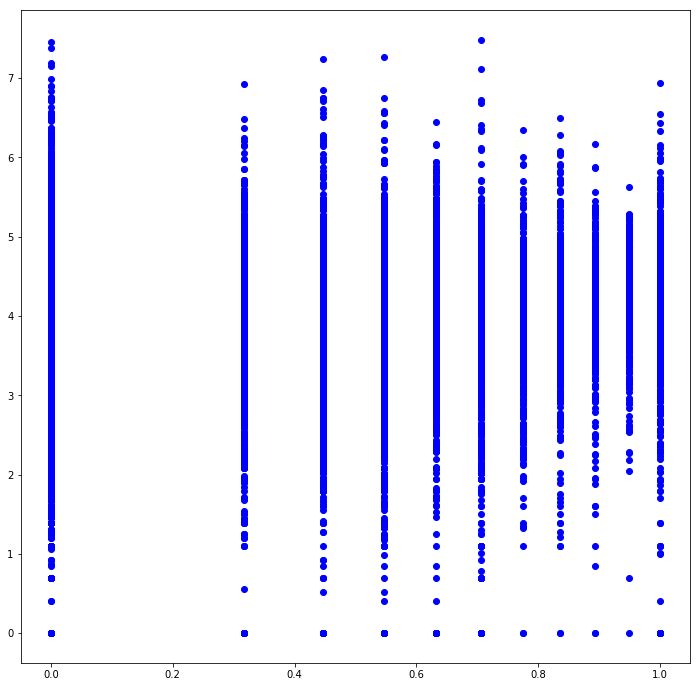

In [348]:
plt.plot(data['img_count']**2, target, 'bo')

In [5]:
from xgboost import XGBRegressor

In [350]:
xgb = XGBRegressor(learning_rate = 0.05, n_estimators = 800, silent = False,
                    n_jobs = -1)

In [483]:
xgb1 = xgb.fit(X_train1, y_train1)

In [352]:
xgb2 = xgb.fit(X_train2, y_train2)


In [354]:
xgbpred1 = xgb1.predict(X_test1)

In [355]:
xgbpred2 = xgb2.predict(X_test2)

In [ ]:
df_xgb = pd.DataFrame(np.exp(y_test1) -1 , index = y_test1.index)

df_xgb.columns = ['TARGET']

In [357]:
df_xgb['PRED'] = np.exp(xgbpred1) -1 

In [358]:
df_xgb2 = pd.DataFrame(np.exp(y_test2) -1 , index = y_test2.index)

In [359]:
df_xgb2.columns = ['TARGET']

In [360]:
df_xgb2['PRED'] = np.exp(xgbpred2) -1 

In [361]:
df_xgbdef = pd.concat([df_xgb, df_xgb2])

In [362]:
median_absolute_error(df_xgbdef['TARGET'], df_xgbdef['PRED'])

20.28836822509743

In [ ]:
xgb = XGBRegressor(learning_rate = 0.05, n_estimators = 800, silent = False,
                    n_jobs = -1)

In [371]:

xgb1 = XGBRegressor()


[0.001,
 0.051,
 0.101,
 0.151,
 0.201,
 0.251,
 0.301,
 0.351,
 0.401,
 0.451,
 0.501,
 0.551,
 0.601,
 0.651,
 0.701,
 0.751,
 0.801,
 0.851,
 0.901,
 0.951]

In [2]:
from xgboost.sklearn import XGBRegressor

In [405]:
params = {
        'min_child_weight':[4,5], 
          'gamma':[i/10.0 for i in range(3,6)],  
          'subsample':[i/10.0 for i in range(6,11)],
          'colsample_bytree':[i/10.0 for i in range(6,11)], 
          'max_depth': [2,3,4],
        'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 600, 700, 800, 900, 1000]}

In [4]:
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.metrics import median_absolute_error

In [397]:
#y_train1

In [406]:
xgbcv = GridSearchCV(XGBRegressor(objective=median_absolute_error, n_jobs = -1),
                     
                     parameters,
                    
                    cv = 5)

#XGBRegressor()

In [ ]:
xgcv1 = xgbcv.fit(np.array(X_train1), np.array(y_train1))

In [ ]:
pred1xgb = np.exp(xgcv1.best_estimator_.predict(np.array(X_test1))) -1

In [ ]:
pred1xgb

In [418]:
#xgcv1.best_estimator_.predict(pd.DataFrame(X_test1, 
                                           #columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98']))

In [420]:
#pred1xgb = np.exp(xgcv1.predict(X_test1)) -1

In [421]:
xgbcv2 = xgbcv.fit(np.array(X_train2), np.array(y_train2))

In [423]:
pred2xgb = np.exp(xgbcv2.best_estimator_.predict(np.array(X_test2))) -1

In [425]:
xgbdf = pd.DataFrame(np.exp(y_test1) -1 , index = y_test1.index)

In [426]:
xgbdf.columns = ['TARGET']

In [427]:
xgbdf['PRED'] = pred1xgb

In [428]:
xgbdf2 = pd.DataFrame(np.exp(y_test2) -1, index = y_test2.index)

In [429]:
xgbdf2.columns = ['TARGET']

In [430]:
xgbdf2['PRED'] = pred2xgb

In [431]:
xgbdfdef = pd.concat([xgbdf, xgbdf2])

In [433]:
median_absolute_error(xgbdfdef['TARGET'], xgbdfdef['PRED'])

20.28228500366197

In [434]:
from sklearn.linear_model import RidgeCV

In [435]:
ridge = RidgeCV(alphas = (0.01, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.5, 1.0, 2.0, 5.0, 10.0),
               cv = 5)

In [437]:
ridge.fit(X_train1, y_train1)

ridgepred1 = np.exp(ridge.predict(X_test1)) -1 

In [ ]:
dfridge = pd.DataFrame(np.exp(y_test1) -1, index = y_test1.index)

dfridge.columns = ['TARGET']

In [439]:
dfridge['pred'] = ridgepred1

In [442]:
ridge.fit(X_train2, y_train2)

ridgepred2 = np.exp(ridge.predict(X_test2).reshape(-1, 1)) -1

dfridge2 = pd.DataFrame(np.exp(y_test2) -1, index = y_test2.index)

dfridge2.columns = ['TARGET']

dfridge2['pred'] = ridgepred2

In [443]:
dfridgetotal = pd.concat([dfridge, dfridge2])

In [444]:
median_absolute_error(dfridgetotal['TARGET'], dfridgetotal['pred'])

21.962400770071426

In [562]:
X_train_total = pd.concat([X_train1, X_train2])

cluster = AgglomerativeClustering(n_clusters = 2)

In [563]:
X_train_total['cluster'] = cluster.fit_predict(X_train_total)

In [446]:
y_train_total = pd.concat([y_train1, y_train2])

In [564]:
xgboost = XGBRegressor(learning_rate = 0.02, n_estimators = 1300, n_jobs = -1, 
                      silent = False, random_state = 7)

In [555]:
pca = PCA(n_components = 80)

In [556]:
pca.fit_transform(X_train_total).shape

(8958, 80)

In [557]:
xgboost.fit(pca.fit_transform(X_train_total), y_train_total)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=1)

In [558]:
median_absolute_error(np.exp(y_test_total) -1 ,np.exp(xgboost.predict(PCA(n_components = 80).fit_transform(X_test_total)) ) - 1 )

24.557881164550864

In [565]:
xgboost.fit(X_train_total, np.array(y_train_total).reshape(-1, 1))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.02, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1300, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=1)

In [566]:
clusterstest = AgglomerativeClustering(2)

In [567]:
X_test_total = pd.concat([X_test1, X_test2])

y_test_total = pd.concat([y_test1, y_test2])

In [569]:
X_test_total['cluster'] = cluster.fit_predict(X_test_total)

In [570]:
xgboost.fit(X_train_total, np.array(y_train_total).reshape(-1, 1))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.02, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1300, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=1)

In [571]:
preds = xgboost.predict(X_test_total)

In [572]:
median_absolute_error(np.exp(y_test_total)-1, np.exp(preds)-1)

18.712167663574405

In [573]:
xgboost.feature_importances_

array([0.01241994, 0.01506561, 0.00436773, 0.00325616, 0.01384037,
       0.00653365, 0.05867827, 0.01586689, 0.01181943, 0.        ,
       0.        , 0.        , 0.01357897, 0.01207121, 0.00872672,
       0.        , 0.        , 0.        , 0.        , 0.0042058 ,
       0.        , 0.        , 0.        , 0.09960802, 0.01784157,
       0.26678365, 0.02006935, 0.01555627, 0.01370622, 0.02191931,
       0.        , 0.        , 0.0093032 , 0.01425335, 0.01156795,
       0.        , 0.        , 0.        , 0.00202235, 0.        ,
       0.        , 0.        , 0.00360919, 0.02102426, 0.        ,
       0.00365879, 0.        , 0.00424261, 0.00662748, 0.0063578 ,
       0.        , 0.        , 0.        , 0.00725021, 0.00911693,
       0.        , 0.        , 0.02323089, 0.01226361, 0.01163691,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00362694, 0.00860773, 0.        , 0.        , 0.        ,
       0.01905202, 0.00686241, 0.00248009, 0.        , 0.     

In [612]:
sorted_idx = np.argsort(xgboost.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train_total.columns[index], xgboost.feature_importances_[index]])

    
#type(X_train_total)

['GA_exit_rate', 0.26678365]
['GA_page_views', 0.09960802]
['HY_tipo_Garaje', 0.07214325]
['HY_num_garajes', 0.058678266]
['HY_tipo_Piso', 0.038682256]
['HY_provincia_Madrid', 0.023230888]
['precio_metros', 0.021919308]
['HY_provincia_Castellón', 0.021024257]
['GA_quincena_ini', 0.020069351]
['HY_provincia_Valencia', 0.01905202]
['GA_mean_bounce', 0.017841572]
['HY_precio', 0.015866892]
['GA_quincena_ult', 0.015556275]
['HY_metros_totales', 0.015065614]
['HY_provincia_Alicante', 0.014253352]
['HY_ascensor', 0.013840367]
['img_count', 0.0137062175]
['IDEA_ind_riqueza', 0.013578971]
['HY_antiguedad', 0.012419944]
['HY_provincia_Málaga', 0.012263613]
['IDEA_rent_alquiler', 0.012071208]
['IDEA_pc_industria', 0.011819425]
['HY_provincia_Murcia', 0.011636908]
['HY_provincia_Almería', 0.0115679465]
['HY_tipo_Casa.de.pueblo', 0.010703104]
['HY_provincia_Albacete', 0.0093032]
['HY_provincia_Las.Palmas', 0.009116928]
['HY_tipo_Oficina', 0.008964207]
['IDEA_ind_liquidez', 0.008726724]
['HY_provin

In [581]:
X_train_reduced = X_train_total[X_train_total.columns[xgboost.feature_importances_ > 0]]

In [607]:
xgboost_red = XGBRegressor(learning_rate = 0.02, n_estimators = 1300, n_jobs = -1, 
                      silent = False, random_state = 7)

In [608]:
xgboost_red.fit(X_train_reduced, y_train_total)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.02, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1300, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=1)

In [609]:
X_test_reduced = X_test_total[X_test_total.columns[xgboost.feature_importances_ > 0]]

In [610]:
preds_red = xgboost_red.predict(X_test_reduced)

In [611]:
median_absolute_error(np.exp(y_test_total)-1, np.exp(preds_red)-1)

18.712167663574405

In [613]:
from sklearn.preprocessing import PolynomialFeatures

In [614]:
poly = PolynomialFeatures(interaction_only = True)

In [615]:
X_train_poly = poly.fit_transform(X_train_reduced)

In [618]:
X_train_poly.shape

(8958, 1432)

In [ ]:
X_test_poly = poly.fit_transform(X_test_reduced)

In [629]:
import sklearn

In [642]:
xgboost2 = XGBRegressor(learning_rate = 0.01, n_estimators = 1300, n_jobs = -1, 
                      silent = False, random_state = 7, reg_lambda = 10, max_delta_step = 10)

In [643]:
xgboost2.fit(X_train_poly, y_train_total)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=10, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1300, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=7, reg_alpha=0,
       reg_lambda=10, scale_pos_weight=1, seed=None, silent=False,
       subsample=1)

In [644]:
preds_2 = xgboost2.predict(X_test_poly)

In [645]:
median_absolute_error(np.exp(y_test_total) -1 , np.exp(preds_2) -1 )

19.684533081054646

In [646]:
xgboost2.feature_importances_

array([0.        , 0.        , 0.00122533, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [647]:
sorted_idx = np.argsort(xgboost2.feature_importances_)[::-1]
for index in sorted_idx:
    print([pd.DataFrame(X_train_poly).columns[index], xgboost2.feature_importances_[index]])

[16, 0.1392299]
[402, 0.04893043]
[117, 0.04135185]
[360, 0.024270521]
[404, 0.020795323]
[267, 0.019495422]
[14, 0.018046172]
[793, 0.014413036]
[410, 0.013740239]
[170, 0.011964638]
[60, 0.011627731]
[262, 0.011575361]
[828, 0.0110719185]
[405, 0.009904722]
[691, 0.009449146]
[433, 0.009147938]
[689, 0.008885409]
[491, 0.008123833]
[494, 0.007789578]
[817, 0.0075501376]
[872, 0.0073333834]
[411, 0.0072295987]
[575, 0.0070606195]
[129, 0.0066466974]
[113, 0.0065650735]
[72, 0.00622244]
[148, 0.0057744454]
[78, 0.005773374]
[70, 0.0057563386]
[787, 0.0056878184]
[414, 0.0056059486]
[153, 0.005602507]
[655, 0.0055069714]
[855, 0.005403533]
[657, 0.0053952867]
[90, 0.0052402965]
[839, 0.0050847684]
[406, 0.0050751395]
[786, 0.0050231917]
[774, 0.0050012297]
[111, 0.0049271365]
[735, 0.0048508733]
[108, 0.0048156204]
[577, 0.004729243]
[438, 0.0046121194]
[132, 0.0045902254]
[833, 0.0045599197]
[757, 0.0045401743]
[69, 0.0045006033]
[361, 0.004467129]
[534, 0.0044158027]
[35, 0.004413522]

[55, 0.0]
[56, 0.0]
[59, 0.0]
[61, 0.0]
[62, 0.0]
[63, 0.0]
[65, 0.0]
[80, 0.0]
[67, 0.0]
[73, 0.0]
[74, 0.0]
[75, 0.0]
[76, 0.0]
[77, 0.0]
[79, 0.0]
[223, 0.0]
[224, 0.0]
[225, 0.0]
[366, 0.0]
[341, 0.0]
[342, 0.0]
[343, 0.0]
[344, 0.0]
[345, 0.0]
[346, 0.0]
[347, 0.0]
[348, 0.0]
[350, 0.0]
[352, 0.0]
[353, 0.0]
[354, 0.0]
[355, 0.0]
[356, 0.0]
[357, 0.0]
[363, 0.0]
[364, 0.0]
[340, 0.0]
[339, 0.0]
[338, 0.0]
[328, 0.0]
[321, 0.0]
[322, 0.0]
[323, 0.0]
[324, 0.0]
[325, 0.0]
[326, 0.0]
[327, 0.0]
[329, 0.0]
[337, 0.0]
[330, 0.0]
[331, 0.0]
[332, 0.0]
[333, 0.0]
[334, 0.0]
[335, 0.0]
[336, 0.0]
[365, 0.0]
[367, 0.0]
[319, 0.0]
[368, 0.0]
[390, 0.0]
[391, 0.0]
[392, 0.0]
[394, 0.0]
[395, 0.0]
[396, 0.0]
[401, 0.0]
[409, 0.0]
[412, 0.0]
[413, 0.0]
[415, 0.0]
[416, 0.0]
[418, 0.0]
[419, 0.0]
[420, 0.0]
[421, 0.0]
[422, 0.0]
[389, 0.0]
[388, 0.0]
[387, 0.0]
[674, 0.0]
[369, 0.0]
[370, 0.0]
[371, 0.0]
[372, 0.0]
[373, 0.0]
[374, 0.0]
[375, 0.0]
[377, 0.0]
[386, 0.0]
[378, 0.0]
[379, 0.0]
[38

[1016, 0.0]
[1017, 0.0]
[1018, 0.0]
[1019, 0.0]
[1020, 0.0]
[1021, 0.0]
[1022, 0.0]
[1023, 0.0]
[1024, 0.0]
[1025, 0.0]
[1026, 0.0]
[1027, 0.0]
[1049, 0.0]
[1051, 0.0]
[1009, 0.0]
[1072, 0.0]
[1074, 0.0]
[1075, 0.0]
[1076, 0.0]
[1077, 0.0]
[1078, 0.0]
[1079, 0.0]
[1080, 0.0]
[1081, 0.0]
[1082, 0.0]
[1083, 0.0]
[1084, 0.0]
[1085, 0.0]
[1086, 0.0]
[1087, 0.0]
[1088, 0.0]
[1089, 0.0]
[1090, 0.0]
[1073, 0.0]
[1071, 0.0]
[1052, 0.0]
[1070, 0.0]
[1053, 0.0]
[1054, 0.0]
[1055, 0.0]
[1056, 0.0]
[1057, 0.0]
[1058, 0.0]
[1059, 0.0]
[1060, 0.0]
[1061, 0.0]
[1062, 0.0]
[1063, 0.0]
[1064, 0.0]
[1065, 0.0]
[1066, 0.0]
[1067, 0.0]
[1068, 0.0]
[1069, 0.0]
[1010, 0.0]
[1008, 0.0]
[924, 0.0]
[944, 0.0]
[946, 0.0]
[947, 0.0]
[948, 0.0]
[949, 0.0]
[950, 0.0]
[951, 0.0]
[952, 0.0]
[953, 0.0]
[954, 0.0]
[955, 0.0]
[956, 0.0]
[957, 0.0]
[958, 0.0]
[959, 0.0]
[960, 0.0]
[961, 0.0]
[962, 0.0]
[945, 0.0]
[943, 0.0]
[964, 0.0]
[942, 0.0]
[925, 0.0]
[926, 0.0]
[927, 0.0]
[928, 0.0]
[929, 0.0]
[930, 0.0]
[931, 0.0

In [13]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01, 0.02, .03, 0.05], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [1000, 1200, 1300, 1400]}

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data.shape

(9955, 99)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 69)

In [15]:
gridsearch = GridSearchCV(estimator = XGBRegressor(n_jobs = -1, silent = False, random_state = 69), 
                         param_grid = parameters,
                         cv = 5)

In [16]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=69, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'nthread': [4], 'objective': ['reg:linear'], 'learning_rate': [0.01, 0.02, 0.03, 0.05], 'max_depth': [5, 6, 7], 'min_child_weight': [4], 'silent': [1], 'subsample': [0.7], 'colsample_bytree': [0.7], 'n_estimators': [1000, 1200, 1300, 1400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
best = gridsearch.best_estimator_

In [18]:
pred = np.exp(best.predict(X_test)) - 1 

In [19]:
median_absolute_error(np.exp(y_test) - 1, pred)

20.508438034057633

In [21]:
median_absolute_error(np.exp(y_train) -1, np.exp(best.predict(X_train)) - 1)

16.040730133056645

In [22]:
best

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=6,
       min_child_weight=4, missing=None, n_estimators=1000, n_jobs=-1,
       nthread=4, objective='reg:linear', random_state=69, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.7)

In [131]:
xgboost_more_estim = XGBRegressor(max_depth = 3, booster = 'gbtree', n_estimators = 1300, learning_rate = 0.01,
                                 reg_lambda = 1, importance_type = "gain", random_state = 7)

In [132]:
xgboost_more_estim.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1300, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [133]:
pred2 = np.exp(xgboost_more_estim.predict(X_test)) -1 

In [134]:
median_absolute_error(np.exp(y_test) - 1, pred2)

20.566492004394746

In [135]:
X_train_reduced = X_train[X_train.columns[xgboost_more_estim.feature_importances_ > 0.05]]

In [136]:
X_test_reduced = X_test[X_train.columns[xgboost_more_estim.feature_importances_ > 0.05]]

In [137]:
xgboost_more_estim.fit(X_train_reduced, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1300, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [138]:
pred = np.exp(xgboost_more_estim.predict(X_test_reduced)) - 1

In [139]:
median_absolute_error(np.exp(y_test) -1, pred)

20.69180603027354

In [126]:
xgboost_more_estim.feature_importances_

array([0.01356154, 0.02433479, 0.01561714, 0.00410316, 0.01781771,
       0.00684446, 0.05584814, 0.01539673, 0.00249488, 0.0336106 ,
       0.00859135, 0.01879859, 0.01657655, 0.14248699, 0.01229009,
       0.2520121 , 0.02355003, 0.01570713, 0.00998551, 0.02562922,
       0.01093926, 0.02071455, 0.00607445, 0.00445811, 0.01935604,
       0.00315178, 0.0093859 , 0.00321221, 0.01035563, 0.01138828,
       0.00640088, 0.00947002, 0.00248245, 0.00644366, 0.01147506,
       0.01672094, 0.00307299, 0.00763763, 0.00873514, 0.05893674,
       0.00555826, 0.00686102, 0.00280895, 0.0281834 , 0.00612778,
       0.00479208], dtype=float32)

In [2]:
data.head()

,HY_antiguedad,HY_metros_totales,HY_num_banos,HY_num_terrazas,HY_ascensor,HY_trastero,HY_num_garajes,HY_precio,IDEA_pc_industria,IDEA_pc_oficina,...,HY_tipo_Piso,HY_tipo_Solar,HY_tipo_Suelo.rústico.no.urbanizable,HY_tipo_Trastero,HY_cert_energ_B,HY_cert_energ_C,HY_cert_energ_D,HY_cert_energ_E,HY_cert_energ_F,HY_cert_energ_G
0,0,0.000019,0.000000,0,0,0,0,0.582859,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0.000084,0.360849,0,0,0,0,0.721202,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0.000056,0.227670,0,1,0,1,0.704641,1,1,...,1,0,0,0,1,0,0,0,0,0
3,0,0.000007,0.000000,0,1,0,0,0.536338,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0.000008,0.000000,0,1,0,0,0.551414,1,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
['GA_exit_rate', 0.26678365]
['GA_page_views', 0.09960802]
['HY_tipo_Garaje', 0.07214325]
['HY_num_garajes', 0.058678266]
['HY_tipo_Piso', 0.038682256]
['HY_provincia_Madrid', 0.023230888]
['precio_metros', 0.021919308]
['HY_provincia_Castellón', 0.021024257]
['GA_quincena_ini', 0.020069351]
['HY_provincia_Valencia', 0.01905202]
['GA_mean_bounce', 0.017841572]
['HY_precio', 0.015866892]
['GA_quincena_ult', 0.015556275]
['HY_metros_totales', 0.015065614]


In [6]:
import pandas as pd
import numpy as np

data = pd.read_csv('transformados04.csv')

target = data['TARGET']

data.drop('TARGET', axis = 1, inplace = True)

In [7]:
data['exit_rate_page_views'] = data['GA_exit_rate']*data['GA_page_views']

In [8]:
#data['exit_rate_tipo_garaje'] = data['GA_exit_rate'] * data['HY_tipo_Garaje']

In [9]:
data['views_precio_metro'] = data['GA_page_views'] * data['precio_metros']

In [427]:
#data['piso_precio_metro'] = data['HY_tipo_Piso'] * data['precio_metros']

In [428]:
#data['piso_madrid_precio_metro'] = data['HY_provincia_Madrid'] * data['HY_tipo_Piso'] * data['precio_metros']
#data.drop('piso_madrid_precio_metro', axis = 1, inplace = True)

In [429]:
#data['exit_rate_precio_metro'] = data['GA_exit_rate'] * data['precio_metros']

In [48]:
#data['exit_rate_2'] = data['GA_exit_rate']**2

In [60]:
#data['img_count_color_var'] = data['img_count'] * data['color_variance']

In [71]:
#data['hardwood_exitrate'] = data['GA_exit_rate'] * data['Hardwood']

In [431]:
data['madrid_metros_totales'] = data['HY_provincia_Madrid'] * data['HY_metros_totales']

In [432]:
#data['mean_bounce_exit_rate'] = data['GA_exit_rate'] * data['GA_mean_bounce']

In [433]:
data['exit_rate_img_count'] = data['GA_exit_rate'] * data['img_count']

In [434]:
#data['mean_bounce_img_count'] = data['GA_mean_bounce'] * data['img_count']

In [435]:
data['quincena_ini_exit_rate'] = data['GA_exit_rate'] * data['GA_quincena_ini']

data['quincena_ulti_exit_rate'] = data['GA_exit_rate'] * data['GA_quincena_ult']

In [416]:
#data['tipo_piso_num_garajes'] = data['HY_tipo_Piso'] * data['HY_num_garajes']

In [147]:
data['tipo_garaje_num_garajes'] = data['HY_tipo_Garaje'] * data['HY_num_garajes']

In [10]:
from sklearn.model_selection import train_test_split

from xgboost.sklearn import XGBRegressor

from xgboost import XGBRegressor

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
import numpy as np

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [120]:
#scaler.fit_transform(np.array(target).reshape(-1, 1))

array([[0.46813799],
       [0.46215986],
       [0.5570515 ],
       ...,
       [0.92760014],
       [0.62476824],
       [0.        ]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.1, random_state = 7)

In [124]:
y_train1 = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

y_test1 = scaler.fit_transform(np.array(y_test).reshape(-1, 1))

In [95]:
parameters = {'objective':['reg:linear'],
              'learning_rate': [0.005, 0.01, 0.02, .03, 0.04, 0.05], #so called `eta` value
              'max_depth': [3, 4],
              'min_child_weight': [1, 2],
              'subsample': [0.8, 0.9],
              'colsample_bytree': [0.7],
              'n_estimators': [1100, 1200, 1300, 1400],
             'reg_alpha': [0.5, 1],
             'reg_lambda': [0, 0.5],
             'random_state': [7],
             'silent':[False]}

In [90]:
from sklearn.metrics import make_scorer

scorer = make_scorer(median_absolute_error)

In [96]:
myxgb = GridSearchCV(estimator = XGBRegressor(),
                     param_grid = parameters, scoring = scorer, n_jobs = -1, verbose = 1,
                    cv = 5)

In [97]:
myxgb.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 75.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 125.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 189.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 264.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 353.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 459.8min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 550.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'objective': ['reg:linear'], 'learning_rate': [0.005, 0.01, 0.02, 0.03, 0.04, 0.05], 'max_depth': [3, 4], 'min_child_weight': [1, 2], 'subsample': [0.8, 0.9], 'colsample_bytree': [0.7], 'n_estimators': [1100, 1200, 1300, 1400], 'reg_alpha': [0.5, 1], 'reg_lambda': [0, 0.5], 'random_state': [7], 'silent': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(median_absolute_error), verbose=1)

In [107]:
myxgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, importance_type='gain',
       learning_rate=0.005, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=7, reg_alpha=1,
       reg_lambda=0, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.8)

In [109]:
sorted_idx = np.argsort(myxgb.best_estimator_.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train.columns[index], myxgb.best_estimator_.feature_importances_[index]])

['GA_exit_rate', 0.09373559]
['GA_page_views', 0.062373903]
['IDEA_ind_riqueza', 0.054359447]
['HY_tipo_Garaje', 0.047008593]
['exit_rate_page_views', 0.042544447]
['IDEA_demand_rent_residential', 0.023488667]
['HY_metros_totales', 0.023410639]
['IDEA_rent_alquiler', 0.022956988]
['GA_mean_bounce', 0.020325977]
['precio_metros', 0.020230366]
['Hardwood', 0.017209541]
['IDEA_stock_sale_residential', 0.016487585]
['IDEA_demand_sale_residential', 0.016476259]
['HY_provincia_Valencia', 0.016285785]
['HY_num_garajes', 0.016159168]
['IDEA_unitprice_sale_residential', 0.014205887]
['IDEA_unitprice_rent_residential', 0.013305368]
['IDEA_ind_tienda', 0.013055876]
['views_precio_metro', 0.01299694]
['Wood', 0.012970955]
['GA_quincena_ini', 0.012481184]
['Property', 0.012449826]
['Floor', 0.011467235]
['IDEA_pc_oficina', 0.011233066]
['HY_precio', 0.010972081]
['IDEA_price_sale_residential', 0.010914559]
['Plaster', 0.010896981]
['HY_provincia_Alicante', 0.010596702]
['Apartment', 0.010378577]
['

In [104]:
predgridsearch = np.exp(myxgb.best_estimator_.predict(X_test)) - 1

In [105]:
median_absolute_error(np.exp(y_test) - 1, predgridsearch)

18.685001144409433

In [125]:
xgb = XGBRegressor(max_depth=4, learning_rate = 0.02, n_estimators = 1200, n_jobs = -1, importance_type = "gain", random_state = 7, reg_lambda = 0, reg_alpha = 1)

In [132]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.02, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=1200, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=7, reg_alpha=1,
       reg_lambda=0, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [112]:
from sklearn.metrics import median_absolute_error
median_absolute_error(np.exp(y_train1) - 1, np.exp(xgb.predict(X_train)) - 1)

16.78980377197262

In [128]:
pred = xgb.predict(X_test)

pred = scaler.inverse_transform(pred.reshape(-1, 1))

In [129]:
pred = np.exp(pred) -1
#pred

array([[ 4.83167915e+01],
       [ 3.33691864e+01],
       [ 4.61454678e+00],
       [ 4.32115364e+01],
       [ 4.28037262e+01],
       [ 4.49463921e+01],
       [ 3.52812614e+01],
       [ 6.18515549e+01],
       [ 4.52748451e+01],
       [ 5.54187012e+01],
       [ 3.89882240e+01],
       [ 2.95849667e+01],
       [ 3.18127403e+01],
       [ 4.98045387e+01],
       [ 2.42752228e+01],
       [ 2.96734600e+01],
       [ 2.79398861e+01],
       [ 4.59070015e+01],
       [ 1.93897781e+01],
       [ 5.20094604e+01],
       [ 4.30508270e+01],
       [ 5.33261452e+01],
       [ 2.46035767e+01],
       [ 4.34066238e+01],
       [ 2.18357620e+01],
       [ 1.77576065e+01],
       [ 2.52880764e+01],
       [ 3.05892754e+01],
       [ 2.59989452e+01],
       [ 4.94452553e+01],
       [ 4.84297295e+01],
       [ 2.00043488e+01],
       [ 4.17649536e+01],
       [ 5.03721275e+01],
       [ 5.76515923e+01],
       [ 5.18534927e+01],
       [ 3.14935608e+01],
       [ 5.07946243e+01],
       [ 4.2

In [130]:
#from sklearn.metrics import median_absolute_error

true =scaler.inverse_transform(np.array(y_test1))

true = np.exp(true) - 1

In [131]:
median_absolute_error(true, pred)

19.142456855773787

In [133]:
median_absolute_errorolute_errorolute_errorolute_error(np.exp(y_test) - 1, np.exp(xgb.predict(X_test)) - 1)

18.114882507324232

In [ ]:
from sklearn.metrics import r2_score

In [33]:
#r2_score(np.exp(y_test) - 1, pred)

In [260]:
#xgb.feature_importances_

In [88]:
sorted_idx = np.argsort(xgb.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train.columns[index], xgb.feature_importances_[index]])

['GA_exit_rate', 0.1170867]
['GA_page_views', 0.057601023]
['HY_tipo_Garaje', 0.052414935]
['IDEA_unitprice_sale_residential', 0.050878137]
['IDEA_rent_alquiler', 0.035600808]
['HY_provincia_Valencia', 0.035204083]
['Hardwood', 0.027170472]
['IDEA_ind_riqueza', 0.024822537]
['precio_metros', 0.018814294]
['IDEA_ind_tienda', 0.01654574]
['Floor', 0.01380102]
['Wood', 0.013771622]
['HY_provincia_Almería', 0.013188031]
['Flooring', 0.012721995]
['Apartment', 0.012248838]
['views_precio_metro', 0.011678541]
['Room', 0.011608446]
['Property', 0.011399806]
['IDEA_ind_liquidez', 0.011133825]
['GA_quincena_ini', 0.011128672]
['Residential.area', 0.010973403]
['Neighbourhood', 0.01085323]
['exit_rate_page_views', 0.01078016]
['Window', 0.010705178]
['HY_tipo_Piso', 0.010559624]
['HY_num_garajes', 0.0100923795]
['HY_provincia_Alicante', 0.010088396]
['GA_quincena_ult', 0.010079229]
['Facade', 0.009946185]
['House', 0.009780283]
['HY_provincia_Castellón', 0.009467612]
['Home', 0.009383992]
['colo

In [111]:
#vamos a sacar los nuevos datos :). 

In [130]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import make_scorer

In [131]:
scorer = make_scorer(median_absolute_error)

In [153]:
ridge = RidgeCV(alphas = (0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1.0, 5.0, 7.0, 10.0),
               scoring = scorer, cv = 5)

In [154]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.01,  0.05,  0.1 ,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.5 ,
        0.6 ,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  1.  ,  5.  ,  7.  ,
       10.  ]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=make_scorer(median_absolute_error), store_cv_values=False)

In [155]:
preds_ridge = np.exp(ridge.predict(X_test)) - 1

In [156]:
median_absolute_error(np.exp(y_test) - 1, preds_ridge)

21.04326704782775

In [1]:
from keras.optimizers import Adam

from keras.models import Model

from keras.layers import Activation, Dense, Dropout



from keras.models import Sequential

from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

from sklearn.preprocessing import MinMaxScaler


C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [41]:
def NN(dropout = 0.15):
  
  
  #Model Creation
  
    model = Sequential()
  
  #first hidden layer
    model.add(Dense(100, input_dim=133, kernel_initializer='normal', activation='relu'))
  
    model.add(Dropout(dropout))
  
  #second hidden layer
    model.add(Dense(40, kernel_initializer = 'normal', activation = 'relu'))
  
    model.add(Dropout(dropout))
  
  #Third hidden layer
    model.add(Dense(20, kernel_initializer = 'normal', activation = 'relu'))
  
    model.add(Dropout(dropout/2))
  
  #Fourth hidden layer (output neuron)
    model.add(Dense(1, kernel_initializer = 'normal'))
  
  #Compile Model. 
    model.compile(loss = "mae",
               optimizer = 'adam')
  
    return model

In [42]:
nn = NN()
nn.fit(X_train, y_train, epochs = 50, batch_size = 128, verbose = 2)

Epoch 1/50
 - 1s - loss: 3.0437
Epoch 2/50
 - 0s - loss: 0.9773
Epoch 3/50
 - 0s - loss: 0.8645
Epoch 4/50
 - 0s - loss: 0.8177
Epoch 5/50
 - 0s - loss: 0.8135
Epoch 6/50
 - 0s - loss: 0.7850
Epoch 7/50
 - 0s - loss: 0.7769
Epoch 8/50
 - 0s - loss: 0.7774
Epoch 9/50
 - 0s - loss: 0.7723
Epoch 10/50
 - 0s - loss: 0.7661
Epoch 11/50
 - 0s - loss: 0.7494
Epoch 12/50
 - 0s - loss: 0.7599
Epoch 13/50
 - 0s - loss: 0.7614
Epoch 14/50
 - 0s - loss: 0.7494
Epoch 15/50
 - 0s - loss: 0.7483
Epoch 16/50
 - 0s - loss: 0.7474
Epoch 17/50
 - 0s - loss: 0.7387
Epoch 18/50
 - 0s - loss: 0.7415
Epoch 19/50
 - 0s - loss: 0.7441
Epoch 20/50
 - 0s - loss: 0.7398
Epoch 21/50
 - 0s - loss: 0.7378
Epoch 22/50
 - 0s - loss: 0.7285
Epoch 23/50
 - 0s - loss: 0.7309
Epoch 24/50
 - 0s - loss: 0.7293
Epoch 25/50
 - 0s - loss: 0.7230
Epoch 26/50
 - 0s - loss: 0.7204
Epoch 27/50
 - 0s - loss: 0.7172
Epoch 28/50
 - 0s - loss: 0.7093
Epoch 29/50
 - 0s - loss: 0.7176
Epoch 30/50
 - 0s - loss: 0.7124
Epoch 31/50
 - 0s -

In [43]:
preds_nn = nn.predict(X_test)

In [44]:
from sklearn.metrics import median_absolute_error

In [45]:
median_absolute_error(np.exp(y_test) - 1, np.exp(preds_nn) - 1)

18.494311752319298

In [47]:
data.shape

(7840, 133)

In [ ]:
X_train1 = X_train[:]d